# Data Defination

![image](bank.png)
UNT DataMining

In [44]:
#import pandas
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import norm
import seaborn as sns
from scipy import stats
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import shapiro

In [2]:

df = pd.read_csv("hmelq.csv")

In [3]:
df.head(5) # to see the first 5 rows of dataset

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [4]:
df.shape #to look at the shape of the dataset

(3576, 13)

It shows that the dataset has 3576 rows(observations) and 13 columns (variables/features)


In [8]:
for i in df.select_dtypes(include=["object"]).columns:
    print(i,": ",df[i].value_counts().count())
#information about the categoric values


reason :  2
job :  6


In [10]:
name_of_col = list(df.columns)
num_var_list = []
str_var_list = []
drop_col=[]

str_var_list = name_of_col.copy()
for var in name_of_col:
    # check if column belongs to numeric type
    if (df[var].dtypes in (np.int, np.int64, np.uint, np.int32, np.float,
                            np.float64, np.float32, np.double)):
        str_var_list.remove(var)
        num_var_list.append(var)
# drop the omit column from list
for var in drop_col:
    if var in str_var_list:
        str_var_list.remove(var)
    if var in num_var_list:
        num_var_list.remove(var)

print("Numeric Column  :", num_var_list,
      "\nCategoric Column :", str_var_list)

# which columns categoric or numeric.

Numeric Column  : ['bad', 'loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno', 'debtinc'] 
Categoric Column : ['reason', 'job']


In [12]:
df=df.dropna()
#remove the non values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      2018 non-null   int64  
 1   loan     2018 non-null   int64  
 2   mortdue  2018 non-null   float64
 3   value    2018 non-null   float64
 4   reason   2018 non-null   object 
 5   job      2018 non-null   object 
 6   yoj      2018 non-null   float64
 7   derog    2018 non-null   float64
 8   delinq   2018 non-null   float64
 9   clage    2018 non-null   float64
 10  ninq     2018 non-null   float64
 11  clno     2018 non-null   float64
 12  debtinc  2018 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


# STATISTICAL INFORMATION

In [22]:
desc_df = df.describe().T
#range = df.max() - df.min()

#range = df.max() - df.min()
#null_count = data.isnull().sum()
#null_percent = (data.isnull().sum() / data.count())*100
#variance = data.var()

#desc_df["range"] = round(range,3)
desc_df# to get the basic summary of all the numeric columns and frequency distribution of all the categorical columns.


,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


In [23]:
data_types=df.dtypes #to print data types for each variable
data_types

bad          int64
loan         int64
mortdue    float64
value      float64
reason      object
job         object
yoj        float64
derog      float64
delinq     float64
clage      float64
ninq       float64
clno       float64
debtinc    float64
dtype: object

In [ ]:
#Missing values

In [24]:
MissingData=df.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values') # the isnull() returns 1 if the value is null
MissingData

,Variables,Missing Values
0,bad,0
1,loan,0
2,mortdue,0
3,value,0
4,reason,0
5,job,0
6,yoj,0
7,derog,0
8,delinq,0
9,clage,0


In [25]:
#dropping rows that have missing data
df.dropna(axis=0, how='any', inplace=True)
df

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,1,7200,15637.0,39660.0,HomeImp,Self,6.0,0.0,1.0,354.24,3.0,42.0,33.624
3546,1,53400,228236.0,305514.0,HomeImp,Self,6.0,0.0,0.0,11.15,0.0,2.0,34.558
3547,1,27300,106221.0,137727.0,DebtCon,Self,3.0,0.0,0.0,300.57,3.0,45.0,32.560
3548,1,37300,68789.0,86172.0,HomeImp,Self,2.0,0.0,6.0,235.64,2.0,25.0,114.051


# Exploratory Data Analysis (EDA)

In this analysis we examine each variable individually. For categorical features we can use bar plots which calculates the total count of each category in a particular variable. For numerical features we can use histograms or density plots.

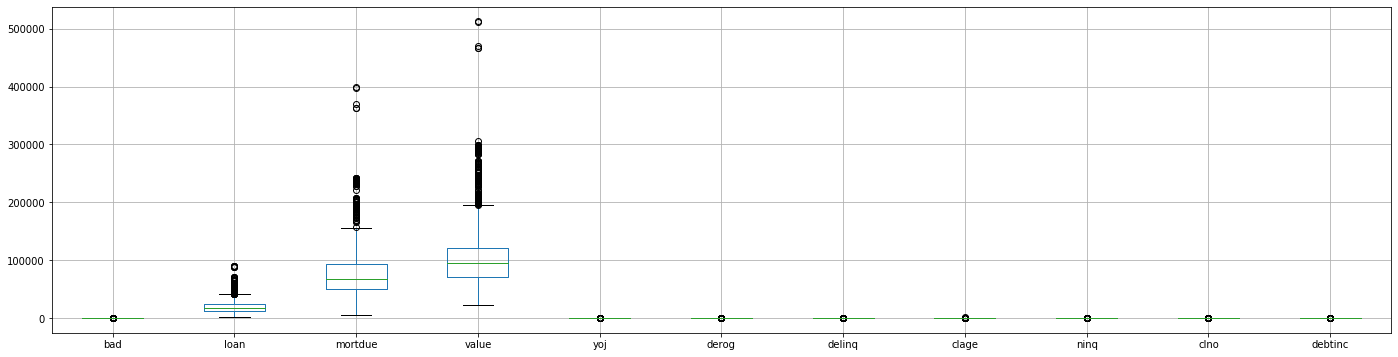

In [27]:
plt.figure(figsize=(24,6))
df.boxplot()
plt.show()

 Loan, Mortdue ve value
 
 some of the columns in X have large variance in the numeric data in them so standard scaling is done to normalize them, they are have outlier values. 

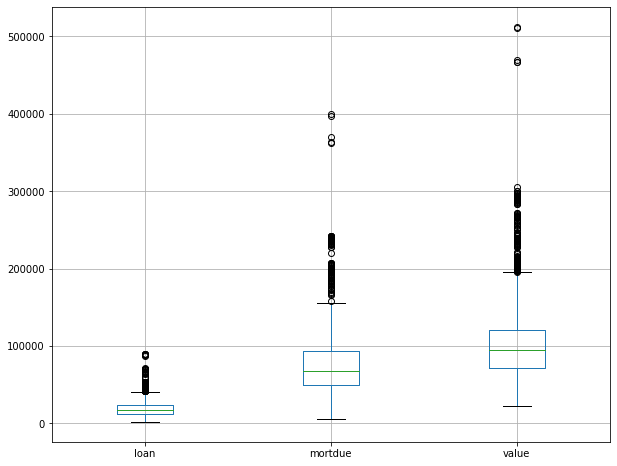

In [29]:
plt.figure(figsize=(10,8))
boxplot_df = df[["loan", "mortdue","value"]]
boxplot_df.boxplot()
plt.show()

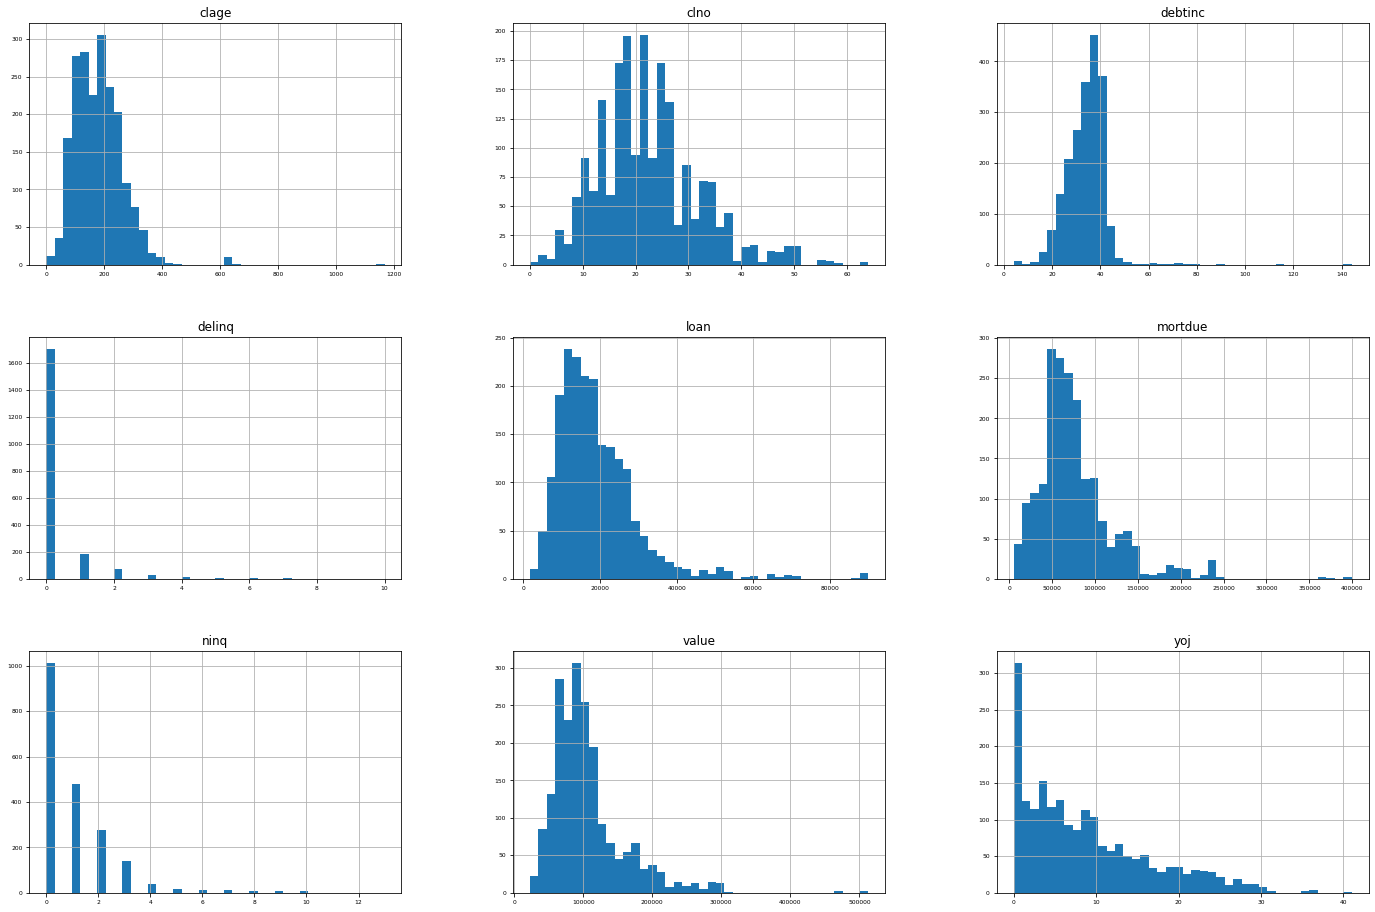

In [31]:
data2 = df.drop(["bad", "derog"], axis=1)
data2.hist(figsize=(24,16), bins=40, xlabelsize=6, ylabelsize=6)
plt.show()

When Dno, loan, mortdue, clage, yoj variables show  almost the gaussian distribution, others show the left skewed distribution



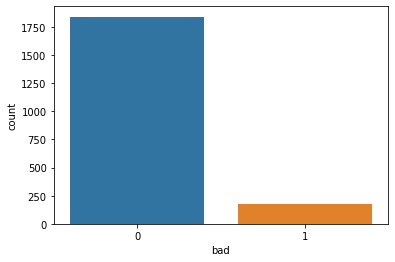

In [35]:
sns.countplot(x="bad", data=df)

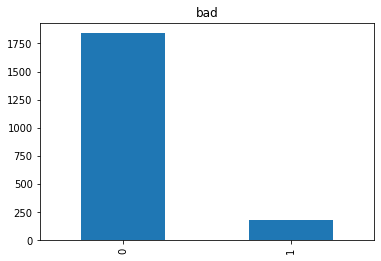

In [32]:
#Frequency distribution of target variable "BAD" and visualizing the target variable
df["bad"].value_counts().plot.bar(title='bad')

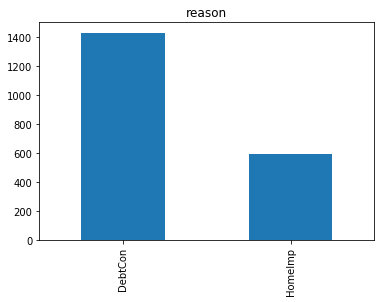

In [33]:
#visualizing the categorical variable REASON
REASON_count= df["reason"].value_counts().rename_axis('reason').reset_index(name='Total Count')
df["reason"].value_counts().plot.bar(title='reason')

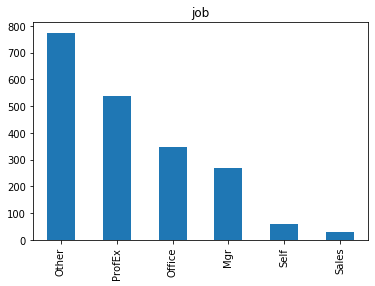

In [36]:
#visualizing the categorical variable JOB
JOB_count= df["job"].value_counts().rename_axis('job').reset_index(name='Total Count')
df["job"].value_counts().plot.bar(title='job')

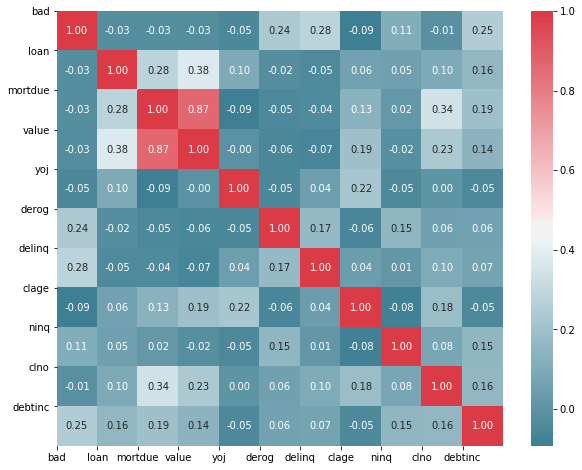

In [37]:
#Create Correlation matrix
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10,8))
#Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

This correlation matrix shows the correlation between all the numeric variables.

The interesting correlation that we can see is that BAD (target variable) is positively correlated with DELINQ, DEROG and DEBTINC


# Data Preprocessing




Encoding

As many of the Machine Learning models takes only the numerical values as input so we have to convert categorical columns to numeric Dummy variable turns categorical variables into a series of 0 and 1, making them much easier to compare

In [38]:
#encoding
df=pd.get_dummies(df, columns=['reason','job'])
df

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,0,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,0
154,0,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,0
155,0,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,0
156,0,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,1,0,0,0,0,0
157,0,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,1,7200,15637.0,39660.0,6.0,0.0,1.0,354.24,3.0,42.0,33.624,0,1,0,0,0,0,0,1
3546,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.15,0.0,2.0,34.558,0,1,0,0,0,0,0,1
3547,1,27300,106221.0,137727.0,3.0,0.0,0.0,300.57,3.0,45.0,32.560,1,0,0,0,0,0,0,1
3548,1,37300,68789.0,86172.0,2.0,0.0,6.0,235.64,2.0,25.0,114.051,0,1,0,0,0,0,0,1


In [39]:
# Extract independent and target variables
X = df.drop(['bad'], axis=1)
y = df['bad']

Data Normalization

some of the columns in X have large variance in the numeric data in them so standard scaling is done to normalize them

In [40]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(X), columns=X.columns)

# Normallik - Shapiro Testi


In [45]:
##tüm nümerik değerlerde bad'in 0 ve 1 olduğu durumlar için shapiro testi
grps=pd.unique(df.bad.values)
grps
alpha=0.05
for i in df.columns:
    if (i!='reason' and i!='job' and i!='bad'):
        for name in grps:
            stat,p=shapiro(df[i][df['bad']==name])
            print(i)
            print(name,"için İstatistik değeri: %.3f, p değeri =" %stat , p)        
            if p >alpha:
                print('Orneklem Normal (Gaussian) dağılımdan gelmektedir')  
            else:
                print('Orneklem Normal (Gaussian) dağılım gostermemektedir')

loan
0 için İstatistik değeri: 0.825, p değeri = 7.618018971455436e-41
Orneklem Normal (Gaussian) dağılım gostermemektedir
loan
1 için İstatistik değeri: 0.904, p değeri = 2.437214208228511e-09
Orneklem Normal (Gaussian) dağılım gostermemektedir
mortdue
0 için İstatistik değeri: 0.876, p değeri = 6.140487180178297e-36
Orneklem Normal (Gaussian) dağılım gostermemektedir
mortdue
1 için İstatistik değeri: 0.753, p değeri = 5.364428532155343e-16
Orneklem Normal (Gaussian) dağılım gostermemektedir
value
0 için İstatistik değeri: 0.857, p değeri = 5.560680210281526e-38
Orneklem Normal (Gaussian) dağılım gostermemektedir
value
1 için İstatistik değeri: 0.735, p değeri = 1.3988843091622356e-16
Orneklem Normal (Gaussian) dağılım gostermemektedir
yoj
0 için İstatistik değeri: 0.914, p değeri = 3.7622141034931923e-31
Orneklem Normal (Gaussian) dağılım gostermemektedir
yoj
1 için İstatistik değeri: 0.877, p değeri = 6.26317955831901e-11
Orneklem Normal (Gaussian) dağılım gostermemektedir
derog
0 i


Bagimsiz T-Test (varianceleri esit degil)


In [47]:
bad = df[df['bad'] == 1]['loan']
good = df[df['bad'] == 0]['loan']

stats.ttest_ind(np.log(bad), np.log(good), equal_var=False)

Ttest_indResult(statistic=-2.3381453653503086, pvalue=0.020379743009413497)

In [50]:
from scipy.stats import levene
from scipy import stats
from scipy.stats import f_oneway
for i in df.columns:
    if (i!='reason' and i!='job' and i!='bad'):
        stat,p = levene(df[i][df['bad'] == 0],
              df[i][df['bad'] == 1]) 
        print("\n",i,"için istatistik değeri: %.3f ve p değeri =" %stat , p)#equal variance test
        alpha=0.05
        if p >alpha:
            print('Orneklem Sabit varyansa(constant variance) sahiptir)')
            const=True
        else:
            print('Orneklem Sabit varyansa(constant variance) sahip değildir')
            const=False
            
        ##aynı döngü içinde ttest yaptım, constant varyansı levene ile aldım(const)
        s,p =stats.ttest_ind(df[i][df['bad'] == 0],
               df[i][df['bad'] == 1])
        print("F_oneway istatistik değeri: %.3f ve p değeri =" %s , p)
        if p < 0.05:
            print("Bu veri etkili bir değişkendir (H0 = reject)")
        else:
            print("Bu veri etkili bir değişken değildir (H0 = fail to reject)")


 loan için istatistik değeri: 2.395 ve p değeri = 0.12189825252399986
Orneklem Sabit varyansa(constant variance) sahiptir)
F_oneway istatistik değeri: 1.176 ve p değeri = 0.23971203285250864
Bu veri etkili bir değişken değildir (H0 = fail to reject)

 mortdue için istatistik değeri: 2.307 ve p değeri = 0.12891801775903636
Orneklem Sabit varyansa(constant variance) sahiptir)
F_oneway istatistik değeri: 1.127 ve p değeri = 0.259677683857574
Bu veri etkili bir değişken değildir (H0 = fail to reject)

 value için istatistik değeri: 3.991 ve p değeri = 0.0458714974437462
Orneklem Sabit varyansa(constant variance) sahip değildir
F_oneway istatistik değeri: 1.407 ve p değeri = 0.15962080002954823
Bu veri etkili bir değişken değildir (H0 = fail to reject)

 yoj için istatistik değeri: 4.210 ve p değeri = 0.040312559874429624
Orneklem Sabit varyansa(constant variance) sahip değildir
F_oneway istatistik değeri: 2.290 ve p değeri = 0.022121892389347888
Bu veri etkili bir değişkendir (H0 = reject

# LOGARITMIC REGRESSION


In [53]:
##Bad'lerin sayısı:
df["bad"].value_counts()

0    1840
1     178
Name: bad, dtype: int64

In [55]:
y=df["bad"]
X=df.drop(["bad"],axis=1)

In [56]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train)
print(y_test)

       loan   mortdue     value   yoj  derog  delinq   clage  ninq  clno  \
205   33700   26395.0   48905.0   6.0    0.0     0.0   48.71   0.0   7.0   
1377  59200   43877.0   74768.0   5.0    0.0     0.0  102.55   0.0  21.0   
1305  22900   41279.0   59993.0   0.0    0.0     0.0  111.24   0.0  17.0   
3134  27000   79218.0  115721.0   9.0    0.0     0.0  280.34   0.0  35.0   
1463  16100   41379.0   57862.0  17.0    0.0     0.0  282.01   0.0  21.0   
...     ...       ...       ...   ...    ...     ...     ...   ...   ...   
1273  16100   72942.0   99544.0   5.0    2.0     0.0   54.95   1.0  20.0   
1668  11500  104610.0  118861.0  18.0    0.0     1.0  203.70   1.0  16.0   
2497   7500   60192.0   76475.0   8.0    0.0     0.0   60.50   2.0  24.0   
835   21500   71636.0   96678.0  13.0    0.0     0.0  135.94   0.0  13.0   
1118   7600   58622.0   77726.0  15.0    0.0     0.0  249.63   2.0  36.0   

      debtinc  reason_DebtCon  reason_HomeImp  job_Mgr  job_Office  job_Other  \
205   

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#Sayıları belirli bir aralığa sıkıştırmak ve scale yapma : Standart Scaler kullanılabilir
#Bu işlem data dağılımının ortalamasının 0 ve stardat sapmasının da bir olacak şekilde dönüştürür
#it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1

In [58]:

## Lojistik regresyon yapalım 
import statsmodels.api as sm
loj=sm.Logit(y_train,X_train_std)
loj_model=loj.fit()
loj_model.summary()
# p değerinin alpha'dan küçük olduğu değerler bizim için y yi aciklama da anlam ifade etmektedir.
# Logistic regresyon modeline bakıldığında 
# derog,delinq,clage,ninq,clno ve debtinc'in anlamlı olduğu söylenir

Optimization terminated successfully.
         Current function value: 0.660734
         Iterations 7


/home/basak/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/home/basak/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/basak/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/basak/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1614
Model:                          Logit   Df Residuals:                     1598
Method:                           MLE   Df Model:                           15
Date:                Mon, 10 Aug 2020   Pseudo R-squ.:                  -1.229
Time:                        01:36:05   Log-Likelihood:                -1066.4
converged:                       True   LL-Null:                       -478.37
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0424      0.059     -0.720      0.472      -0.158       0.073
x2            -0.1097      0.114     -0.964      0.335      -0.333       0.113
x3             0.1222      0.114      1.069      0.285      -0.102       0.346
x4            -0.0561      0.055     -1.024      0.306      -0.164       0.051
x5             0.2679      0.075      3.591      0.000       0.122       0.414
x6             0.3964      0.072      5.487      0.000       0.255       0.538
x7            -0.0761      0.056     -1.360      0.174      -0.186       0.034
x8             0.0823      0.055      1.505      0.132      -0.025       0.190
x9            -0.1040      0.059     -1.751      0.080      -0.220       0.012
x10            0.3091      0.063      4.937      0.000       0.186       0.432
x11            0.0060        nan        nan        nan         nan         nan
x12           -0.0060        nan        nan        nan         nan         nan
x13           -0.0049        nan        nan        nan         nan         nan
x14           -0.0280        nan        nan        nan         nan         nan
x15           -0.0148        nan        nan        nan         nan         nan
x16            0.0168        nan        nan        nan         nan         nan
x17            0.0813      0.082      0.990      0.322      -0.080       0.242
x18            0.0080        nan        nan        nan         nan         nan
==============================================================================
"""

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
loj=LogisticRegression(solver="liblinear")
loj_model=loj.fit(X_train_std, y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
# gerçek y değerlerim ile yukarıdaki tahmin değerleri  ile kıyaslamak için;
y_probs = loj_model.predict_proba(X_test_std)
y_probs = y_probs[:,1]
y_probs[0:10]
# değerlerin 1 olma olasılıkları


array([0.03198395, 0.09500294, 0.05792578, 0.10642979, 0.08195315,
       0.07163023, 0.02477879, 0.02302705, 0.03580538, 0.12339192])

In [65]:
# changing treshold of the predicting model
y_pred = [1 if i > 0.5 else 0 for i in y_probs]
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [66]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[366,   1],
       [ 27,  10]])

Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. 

In [67]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9306930693069307
Precision: 0.9090909090909091
Recall: 0.2702702702702703


In [68]:
#prediction = loj.predict(X_test_std)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       367
           1       0.91      0.27      0.42        37

    accuracy                           0.93       404
   macro avg       0.92      0.63      0.69       404
weighted avg       0.93      0.93      0.91       404



Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct.

In [71]:
# changing treshold of the predicting model
y_pred = [1 if i > 0.7 else 0 for i in y_probs]
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [72]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[367,   0],
       [ 31,   6]])

In [73]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9232673267326733
Precision: 1.0
Recall: 0.16216216216216217


In [74]:
#prediction = loj.predict(X_test_std)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       367
           1       1.00      0.16      0.28        37

    accuracy                           0.92       404
   macro avg       0.96      0.58      0.62       404
weighted avg       0.93      0.92      0.90       404



In [75]:
loj_model.predict_proba(X_test_std)[:,1][0:5]

array([0.03198395, 0.09500294, 0.05792578, 0.10642979, 0.08195315])

In [76]:
#roc curve ün 1e yakın olmasını bekliyoruz modelin doğruluğunu test ediyoruz bunlar ne kadar fit ediyor
import numpy as np
import os
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve


logit_roc_auc=roc_auc_score(y_test,loj_model.predict(X_test_std))
logit_roc_auc

0.6337727373149716

In [77]:
fpr, tpr, thresholds = roc_curve(y_test, loj_model.predict_proba(X_test_std)[:,1])
print("fpr: ",fpr[0:10])
print("tpr: ",tpr[0:10])
print("thresholds: ",thresholds[0:10])

fpr:  [0.         0.         0.         0.0027248  0.0027248  0.00544959
 0.00544959 0.00817439 0.00817439 0.02452316]
tpr:  [0.         0.02702703 0.16216216 0.16216216 0.27027027 0.27027027
 0.2972973  0.2972973  0.35135135 0.35135135]
thresholds:  [1.99986966 0.99986966 0.78219241 0.66080357 0.52446951 0.42397899
 0.40521352 0.36146102 0.33820806 0.2897076 ]


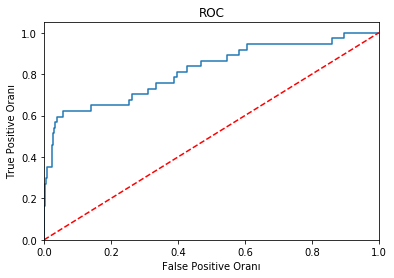

In [78]:
### en baştan curve eden ve sonra converge eden bir eğri bekliyorum ki grafiğin altında kalan 1e daha yakın olsun
plt.figure()
plt.plot(fpr,tpr,label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()


are of the under the curve: 0.6337727373149716